In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import Levenshtein as leven
from random import randint

# Explore

In [2]:
leven.distance('http://54.94.157.240/petart/avaron.exe', 'http://198.12.81.125/ugc/vbc.exe')

21

In [3]:
dataframe = pd.read_csv('../Documents/BD/Log.csv', header = 8)

In [4]:
dataframe.head()

,# id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter
0,1468582,2021-07-20 12:55:03,http://makeownpharma.com/prof--ruthe-cremin/Li...,offline,malware_download,"html,Qakbot,qbot,SilentBuilder,TR,zip",https://urlhaus.abuse.ch/url/1468582/,Cryptolaemus1
1,1468583,2021-07-20 12:55:03,http://bellatti-barton.com/dr--amy-kuphal/Oliv...,offline,malware_download,"html,Qakbot,qbot,SilentBuilder,TR,zip",https://urlhaus.abuse.ch/url/1468583/,Cryptolaemus1
2,1468581,2021-07-20 12:53:06,http://54.94.157.240/petart/avaron.exe,online,malware_download,"exe,Loki,opendir",https://urlhaus.abuse.ch/url/1468581/,abuse_ch
3,1468580,2021-07-20 12:53:04,http://198.12.81.125/ugc/vbc.exe,online,malware_download,"AgentTesla,exe",https://urlhaus.abuse.ch/url/1468580/,abuse_ch
4,1468578,2021-07-20 12:52:12,http://59.96.31.207:34561/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/1468578/,lrz_urlhaus


In [5]:
#Ajout comment
dataframe['dateadded'] = pd.to_datetime(dataframe['dateadded'])

In [6]:
dataframe.describe(include='all')

/home/stucki/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,# id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter
count,8.749800e+04,87498,87498,87498,87498,87498,87498,87498
unique,NaN,64687,87498,2,1,339,87498,48
top,NaN,2021-07-15 16:04:04,http://makeownpharma.com/prof--ruthe-cremin/Li...,offline,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/1468582/,lrz_urlhaus
freq,NaN,10,1,81333,87498,61931,1,60974
first,NaN,2021-06-20 00:00:05,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-07-20 12:55:03,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.424787e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.532055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.380810e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.402941e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='dateadded', ylabel='count'>

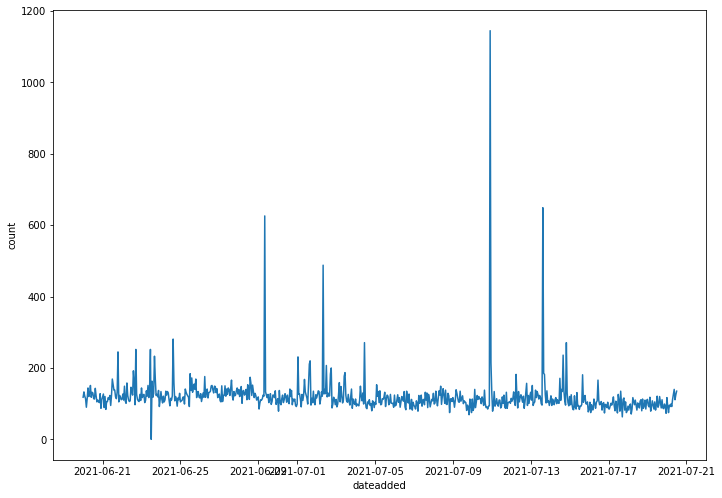

In [7]:
df_ts = dataframe.groupby([pd.Grouper(key='dateadded',freq='H')]).size().reset_index(name='count')

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(ax=ax, data=df_ts, x="dateadded", y="count")

In [8]:
df_ts['count'].mean()

119.36971350613915

In [9]:
df_ts

,dateadded,count
0,2021-06-20 00:00:00,118
1,2021-06-20 01:00:00,133
2,2021-06-20 02:00:00,121
3,2021-06-20 03:00:00,114
4,2021-06-20 04:00:00,90
...,...,...
728,2021-07-20 08:00:00,126
729,2021-07-20 09:00:00,140
730,2021-07-20 10:00:00,111
731,2021-07-20 11:00:00,125


# Clustering

In [61]:
dataframe['date_round'] = pd.Series(np.array(dataframe.dateadded, dtype='datetime64[h]'))

In [62]:
indexes_of_greatest_pics = df_ts['count'].sort_values()[-4:].index

for index in indexes_of_greatest_pics:
    timestamp = df_ts.iloc[index]['dateadded']
    data = dataframe[dataframe['date_round'] == timestamp1]

In [63]:
index1 = df_ts[df_ts['count'] == df_ts['count'].max()]['dateadded'].index[0]
timestamp1 = df_ts.iloc[index1]['dateadded']
data_max = dataframe[dataframe['date_round'] == timestamp1]

In [64]:
random_index = randint(1, 732)
timestamp2 = df_ts.iloc[random_index]['dateadded']
data_2 = dataframe[dataframe['date_round'] == timestamp2]

In [65]:
data_2.shape

(110, 9)

In [66]:
tab1 = data_max.url.to_numpy()

In [67]:
from sklearn.cluster import dbscan

def lev_metric(x, y):
    i, j = int(x[0]), int(y[0])     # extract indices
    return leven.distance(tab1[i], tab1[j])

X = np.arange(len(tab1)).reshape(-1, 1)

list_n_signaux = []
for i in range(1,15,2):
    tab_dbscan = dbscan(X, metric=lev_metric, eps=i, min_samples=2)[0]
    df_unique_cluster = data_max[data_max.reset_index().index.isin(tab_dbscan)]
    n_signaux = df_unique_cluster.shape[0]
    list_n_signaux.append(n_signaux)

<AxesSubplot:>

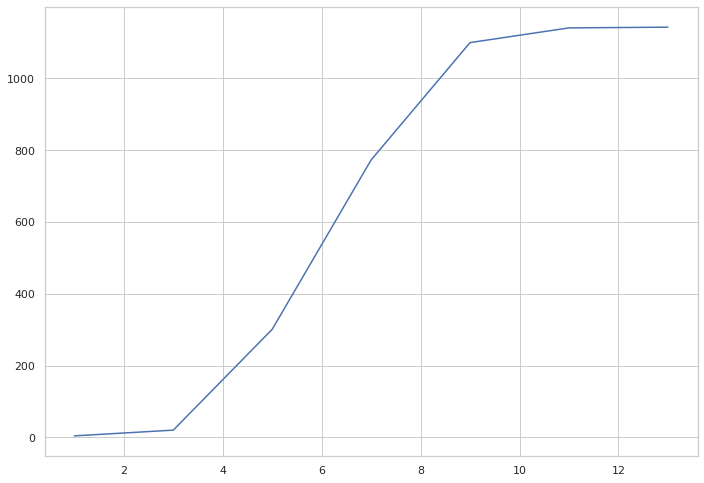

In [68]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(ax=ax, x=[i for i in range(1,15,2)], y=list_n_signaux)

In [69]:
#first_cluster = data_max[data_max.reset_index().index.isin(dbscan(X, metric=lev_metric, eps=8, min_samples=2)[0])]

In [70]:
frames = [data_max,data_2]
tab_deux_signaux_max = pd.concat(frames)

In [71]:
tab2 = tab_deux_signaux_max.url.to_numpy()

In [72]:
X = np.arange(len(tab2)).reshape(-1, 1)

def lev_metric(x, y):
    i, j = int(x[0]), int(y[0])     # extract indices
    return leven.distance(tab2[i], tab2[j])

tab_dbscan = dbscan(X, metric=lev_metric, eps=8, min_samples=2)[0]
df_unique_cluster = tab_deux_signaux_max[tab_deux_signaux_max.reset_index().index.isin(tab_dbscan)]

In [73]:
df_unique_cluster['date_round'].value_counts()

2021-07-10 22:00:00    987
2021-06-28 22:00:00     80
Name: date_round, dtype: int64

# Decile

In [25]:
pourcentage = 50

In [26]:
number_values = df_ts.shape[0]

In [27]:
df_ts_sorted = df_ts.sort_values(by = ['count'])

In [28]:
too_low_values = df_ts_sorted[:number_values//pourcentage]
too_high_values = df_ts_sorted[-number_values//pourcentage:]

In [29]:
too_low_values_threshold = df_ts_sorted[:number_values//pourcentage]['count'].iloc[-1]
too_high_values_threshold = df_ts_sorted[-number_values//pourcentage:]['count'].iloc[0]

In [30]:
avg = df_ts_sorted['count'].mean()

In [31]:
def custom_status(count):
    if count > avg:
        return 1
    else:
        return 0

In [32]:
frames = [too_low_values, too_high_values]
alert_values = pd.concat(frames)
alert_values['status'] = alert_values.apply(lambda x: custom_status(x['count']) ,axis=1)

In [33]:
df_ts['max_threshold'] = df_ts.apply(lambda x: too_high_values_threshold,axis=1)
df_ts['min_threshold'] = df_ts.apply(lambda x: too_low_values_threshold,axis=1)

<AxesSubplot:xlabel='dateadded', ylabel='count'>

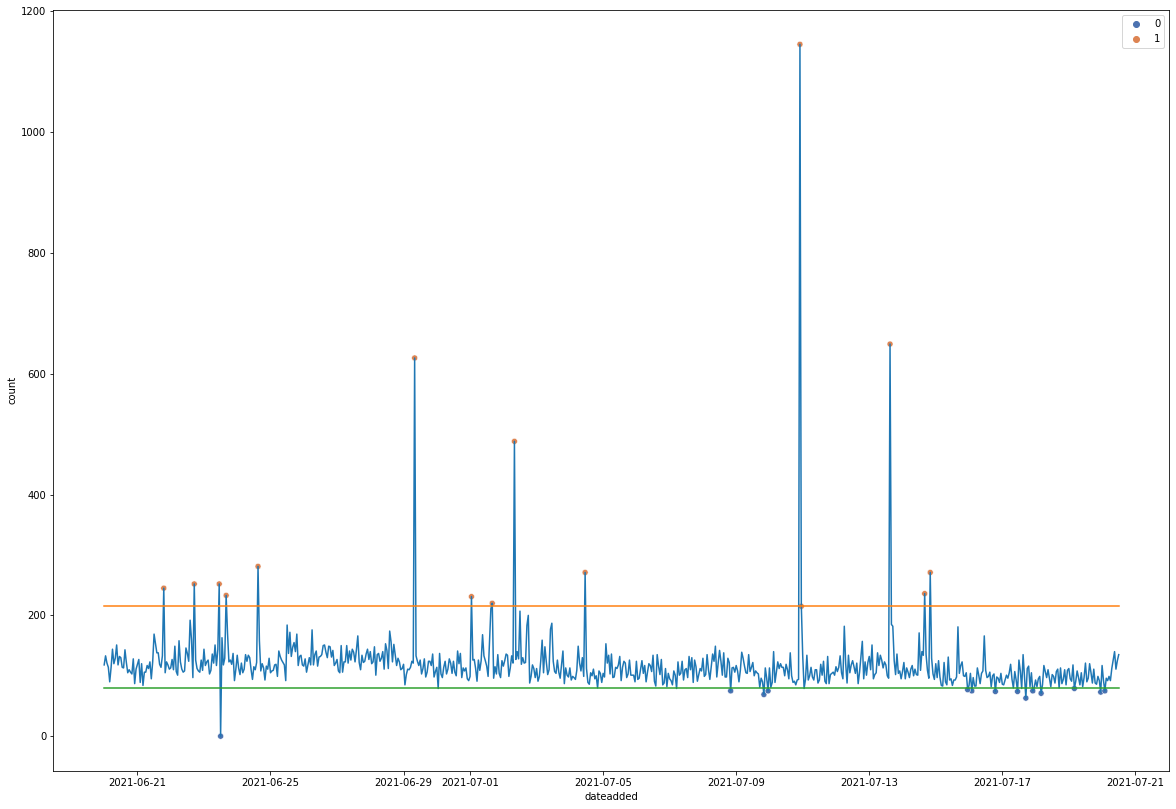

In [34]:
dims = (20, 14)
fig, ax = pyplot.subplots(figsize=dims)
sns.scatterplot(ax=ax, data=alert_values, x="dateadded", y="count", hue='status', palette="deep")
sns.lineplot(ax=ax, data=df_ts, x="dateadded", y="count")
sns.lineplot(ax=ax, data=df_ts, x="dateadded", y="max_threshold")
sns.lineplot(ax=ax, data=df_ts, x="dateadded", y="min_threshold")

In [35]:
num_alertes = too_high_values.shape[0] + too_low_values.shape[0]
num_alertes

29

In [36]:
occ_reporter = dataframe['reporter'].value_counts()
dataframe_reporter = pd.DataFrame(occ_reporter[:10]).reset_index()
occ_reporter[:10]

lrz_urlhaus      60974
geenensp         11355
Gandylyan1        3488
Petras_Simeon     2317
tolisec           2064
Cryptolaemus1     1682
tammeto           1487
switchcert        1201
zbetcheckin       1129
abuse_ch           665
Name: reporter, dtype: int64

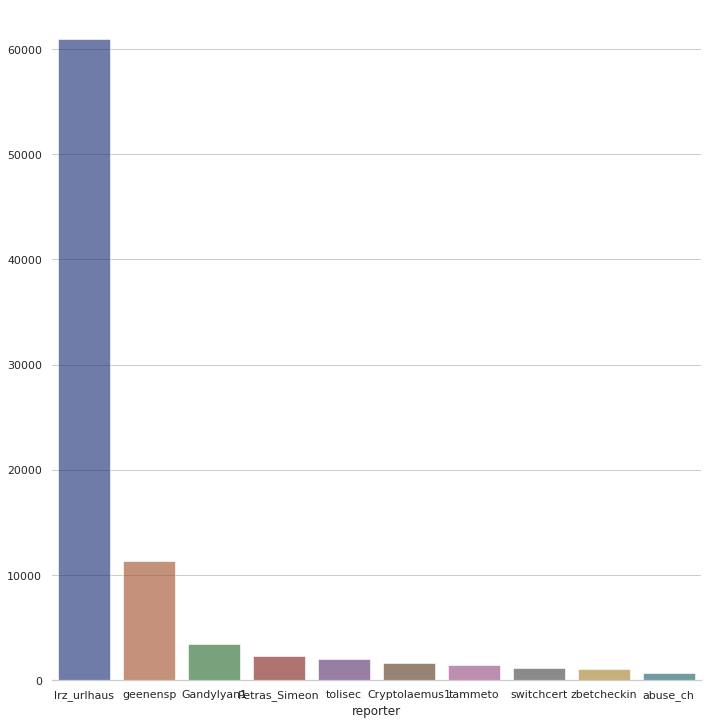

In [37]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=dataframe_reporter,x ="index",y="reporter", kind="bar",ci="sd", palette="dark", alpha=.6, height=10
)

g.despine(left=True)
g.set_axis_labels("reporter", "")